# Neuronales Netzwerk: Data Preparation
## Neuronales Modell mit unseren Daten (Häuserpreise angepasst)

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

# Import Data
data = pd.read_csv("/workspaces/MA-bakery-sales-prediction/_data_prepared/df_dataset_complete.csv")
# data = pd.read_csv("/workspaces/MA-bakery-sales-prediction/_data_prepared/df_training.csv")
data.head()  # Print first few rows to verify

,Datum,Umsatz,Warengruppe,Brot,Broetchen,Croissant,Konditorei,Kuchen,Saisonbrot,national_holiday,...,Wettercode_2_leichter_niederschlag,Wettercode_3_starker_niederschlag,Wettercode_4_gewitter,Wochentag_Mo,Wochentag_Di,Wochentag_Mi,Wochentag_Do,Wochentag_Fr,Wochentag_Sa,Wochentag_So
0,2013-07-01,148.828353,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-07-01,535.856285,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-07-01,201.198426,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-07-01,65.890169,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-07-01,317.475875,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creation of dummy variables for all categorical variables
Brauchen wir das nächste Feld überhaupt? Wir haben ja schon Dummies für alle Variablen...

In [4]:
# # Define categorical features
# categorical_features = ['Warengruppe']

# # Inspect data types and unique values for categorical columns
# print(data[categorical_features].dtypes)
# print("Unique Values:\n",data[categorical_features].apply(lambda x: x.unique()))

# # Ensure categorical columns are treated as categories
# for col in categorical_features:
#     data[col] = data[col].astype('category')

# # Encode categorical variables using pd.get_dummies
# features = pd.get_dummies(data[categorical_features], drop_first=True, dtype=int)

# # Include any numeric columns that are not categorical
# features['sqft_living15'] = data['sqft_living15']

# # Construct the prepared data set including the dependent variable ('label')
# prepared_data = pd.concat([data[['price']], features], axis=1)

# # Handle missing values by removing rows with any missing values
# prepared_data = prepared_data.dropna()

# # Display the shape of the prepared data set
# print(prepared_data.shape)
# # Display the first few rows of the prepared data set
# prepared_data.head()

Warengruppe    float64
dtype: object
Unique Values:
    Warengruppe
0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
5          6.0
6          NaN


KeyError: 'sqft_living15'

## Selection of Training, Validation and Test Data (not needed as we already divided the data...)

In [5]:
# import numpy as np
# # Set a random seed for reproducibility
# np.random.seed(42)

# # Shuffle the data
# data = data.sample(frac=1).reset_index(drop=True)

# # Calculate the number of rows for each dataset
# n_total = len(data)
# n_training = int(0.7 * n_total)
# n_validation = int(0.20 * n_total)

# # Split the features and labels for training, validation, and test
# training_data = data.iloc[:n_training]
# validation_data = data.iloc[n_training:n_training+n_validation]
# test_data = data.iloc[n_training+n_validation:]

# # Separating features and labels
# training_features = data.drop('Umsatz', axis=1)
# validation_features = validation_data.drop('Umsatz', axis=1)
# test_features = test_data.drop('Umsatz', axis=1)

# training_labels = training_data[['Umsatz']]
# validation_labels = validation_data[['Umsatz']]
# test_labels = test_data[['Umsatz']]

# # Print dimensions of the dataframes
# print("Training features dimensions:", training_features.shape)
# print("Validation features dimensions:", validation_features.shape)
# print("Test features dimensions:", test_features.shape)
# print()
# print("Training labels dimensions:", training_labels.shape)
# print("Validation labels dimensions:", validation_labels.shape)
# print("Test labels dimensions:", test_labels.shape)

Training features dimensions: (9736, 42)
Validation features dimensions: (1947, 42)
Test features dimensions: (974, 42)

Training labels dimensions: (6815, 1)
Validation labels dimensions: (1947, 1)
Test labels dimensions: (974, 1)


## Data Export (what are .pkl files?!)

In [6]:
# Create subdirectory for the pickle files
subdirectory = "pickle_data"
os.makedirs(subdirectory, exist_ok=True)

# Export of the prepared data to subdirectory as pickle files
training_features.to_pickle(f"{subdirectory}/training_features.pkl")
validation_features.to_pickle(f"{subdirectory}/validation_features.pkl")
test_features.to_pickle(f"{subdirectory}/test_features.pkl")
training_labels.to_pickle(f"{subdirectory}/training_labels.pkl")
validation_labels.to_pickle(f"{subdirectory}/validation_labels.pkl")
test_labels.to_pickle(f"{subdirectory}/test_labels.pkl")

# Neuronales Netzwerk: Data Preparation
## Importing the Data 
We will start by importing the data and taking a look at the first few rows.

In [8]:
# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (9736, 42)
Loaded Validation features dimensions: (1947, 42)
Loaded Test features dimensions: (974, 42)

Loaded Training labels dimensions: (6815, 1)
Loaded Validation labels dimensions: (1947, 1)
Loaded Test labels dimensions: (974, 1)

First few rows of loaded training features:
        Datum Warengruppe  Brot  Broetchen  Croissant  Konditorei  Kuchen  \
0  2015-01-20         2.0   0.0        1.0        0.0         0.0     0.0   
1  2015-04-21         4.0   0.0        0.0        0.0         1.0     0.0   
2  2018-01-28         4.0   0.0        0.0        0.0         1.0     0.0   
3  2013-11-05         1.0   1.0        0.0        0.0         0.0     0.0   
4  2014-10-05         5.0   0.0        0.0        0.0         0.0     1.0   

   Saisonbrot  national_holiday  christmas_market  ...  \
0         0.0               0.0               0.0  ...   
1         0.0               0.0               0.0  ...   
2         0.0               0.0             

## Installation of dependencies

In [3]:
# Once only 
!rm -rf myenv
!python -m venv myenv
# Run the following command in your terminal:
# source myenv/bin/activate  # On Windows use `myenv\Scripts\activate`
!pip install -y numpy==1.26.0
!pip install -y tensorflow==2.17.1


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


## Defining the Neural Network
Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Example data for training_features
# Replace this with your actual data loading code
training_features = pd.DataFrame(np.random.rand(100, 10))  # 100 samples, 10 features

# Define the model
model = Sequential([
    InputLayer(shape=(training_features.shape[1], )),
    BatchNormalization(),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

# Print the model summary
model.summary()

ModuleNotFoundError: No module named 'tensorflow'

## Compiling and Training the Model 
We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [11]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Example data for training_features and training_labels
# Replace this with your actual data loading code
training_features = pd.DataFrame(np.random.rand(100, 10))  # 100 samples, 10 features
training_labels = pd.Series(np.random.rand(100))  # 100 labels

# Define the model
model = Sequential([
    InputLayer(shape=(training_features.shape[1], )),
    BatchNormalization(),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Print the model summary
model.summary()

# Train the model
model.fit(training_features, training_labels, epochs=10, batch_size=32)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 20 (80.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.4460
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1134 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.7565 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3419 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1469 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9214 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6800 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4701 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2487 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9742 


## What is the difference to the previous code chunk?!

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Example data for training and validation features and labels
# Replace this with your actual data loading code
training_features = pd.DataFrame(np.random.rand(100, 10))  # 100 samples, 10 features
training_labels = pd.Series(np.random.rand(100))  # 100 labels
validation_features = pd.DataFrame(np.random.rand(20, 10))  # 20 samples, 10 features
validation_labels = pd.Series(np.random.rand(20))  # 20 labels

# Define the model
model = Sequential([
    InputLayer(shape=(training_features.shape[1], )),
    BatchNormalization(),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Print the model summary
model.summary()

# Train the model with validation data
model.fit(training_features, training_labels, epochs=10, batch_size=32, validation_data=(validation_features, validation_labels))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 20 (80.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.3276 - val_loss: 0.2114
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2721 - val_loss: 0.1953
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2279 - val_loss: 0.1852
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2578 - val_loss: 0.1800
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2228 - val_loss: 0.1755
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2154 - val_loss: 0.1738
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1961 - val_loss: 0.1737
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2032 - val_loss: 0.1761
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1672 - val_loss: 0.1781
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1875 - val_loss: 0.1814


## Steffens Code chunk

In [13]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1893 - val_loss: 0.1827
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1877 - val_loss: 0.1869
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1843 - val_loss: 0.1965
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1987 - val_loss: 0.1997
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1788 - val_loss: 0.2002
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1691 - val_loss: 0.1979
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1620 - val_loss: 0.1960
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1561 - val_loss: 0.1963
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1509 - val_loss: 0.1949
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1307 - val_loss: 0.1933
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1475 - val_loss: 0.1944
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1366 - val_loss: 0.1957
Epoch 13/20


## Saving the Trained Model
After training, it's a good practice to save the model for future use.

In [14]:
model.save("neuronales_modell.h5")

## Plotting Training History
Visualizing the training and validation loss can help us understand the model's performance over time.

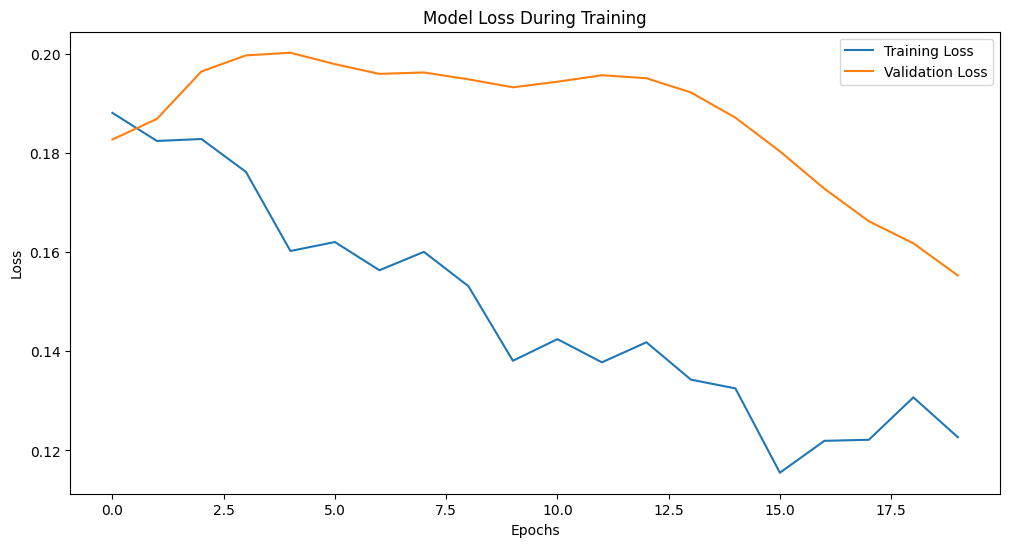

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Making Predictions and Evaluating the Model
Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [16]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MAPE on the Training Data: 134.82%
MAPE on the Validation Data: 70.02%


## Visualizing Predictions vs Actual Values
Visualizing the predicted versus actual values can provide insights into the model's accuracy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


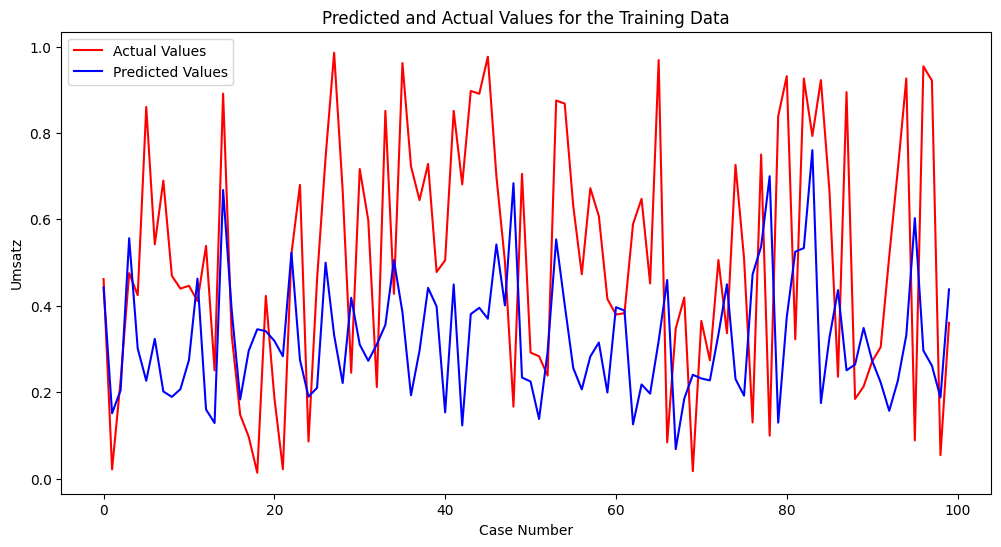

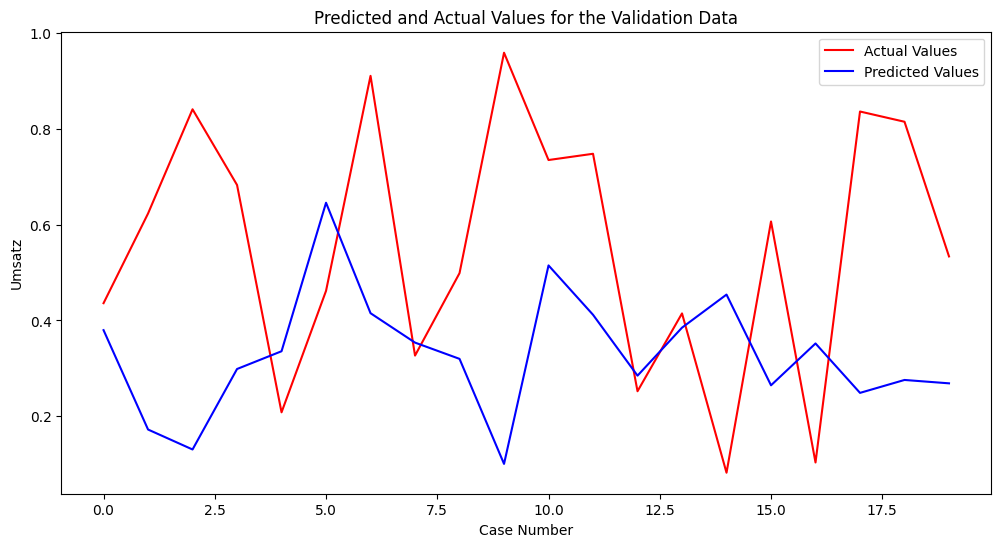

In [19]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Umsatz')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')